# Maven Pizza Challenges


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading & Inspecting Dataset

In [3]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizza = pd.read_csv('pizzas.csv')
pizza_type = pd.read_csv('pizza_types.csv' , encoding='latin1')

In [4]:
orders.head()

order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [6]:
order_details.head()

order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
order_details['quantity'].describe().round(2)

count    48620.00
mean         1.02
std          0.14
min          1.00
25%          1.00
50%          1.00
75%          1.00
max          4.00
Name: quantity, dtype: float64

In [9]:
pizza.head()

pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

In [10]:
pizza['price'].describe().round(2)

count    96.00
mean     16.44
std       4.09
min       9.75
25%      12.50
50%      16.25
75%      20.25
max      35.95
Name: price, dtype: float64

In [11]:
pizza_type.head()

pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...

In [12]:
from ydata_profiling import ProfileReport
ProfileReport(orders)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
from ydata_profiling import ProfileReport
ProfileReport(order_details)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 34.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
from ydata_profiling import ProfileReport
ProfileReport(pizza)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 130.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
from ydata_profiling import ProfileReport
ProfileReport(pizza_type)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 48.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing.

In [16]:
orders.head()

order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

In [17]:
orders['date'] = pd.to_datetime(orders['date'])
orders['time'] = pd.to_datetime(orders['time'])


C:\Users\abdal\AppData\Local\Temp\ipykernel_17944\4119192167.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['time'] = pd.to_datetime(orders['time'])


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [19]:
def get_day_part(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


In [20]:
orders['hour'] = orders['time'].dt.hour
orders['day name'] = orders['date'].dt.day_name()
orders['year'] = orders['date'].dt.year
orders['month'] = orders['date'].dt.month_name()
orders['day part'] = orders['hour'].apply(get_day_part)


In [21]:
orders.head()

order_id       date                time  hour  day name  year    month  \
0         1 2015-01-01 2025-11-25 11:38:36    11  Thursday  2015  January   
1         2 2015-01-01 2025-11-25 11:57:40    11  Thursday  2015  January   
2         3 2015-01-01 2025-11-25 12:12:28    12  Thursday  2015  January   
3         4 2015-01-01 2025-11-25 12:16:31    12  Thursday  2015  January   
4         5 2015-01-01 2025-11-25 12:21:30    12  Thursday  2015  January   

    day part  
0    Morning  
1    Morning  
2  Afternoon  
3  Afternoon  
4  Afternoon

In [22]:
order_details.head()

order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

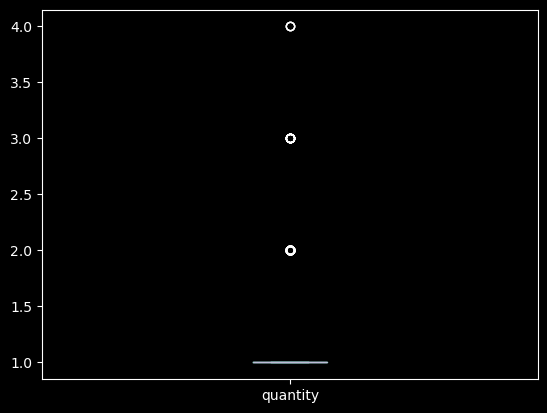

In [23]:
order_details['quantity'].plot(kind='box')
plt.show()

In [24]:
print(f'len before remove the outliers: {len(order_details)}')

len before remove the outliers: 48620


In [25]:
quantity_q1 = order_details['quantity'].quantile(0.25)
quantity_q3 = order_details['quantity'].quantile(0.75)

quantity_IQR = quantity_q3 - quantity_q1

quantity_lower = quantity_q1 - 1.5 * quantity_IQR
quantity_upper = quantity_q3 + 1.5 * quantity_IQR

order_details = order_details[( order_details['quantity'] >= quantity_lower ) & (order_details['quantity'] <= quantity_upper )  ]



In [26]:
print(f'len after remove the outliers: {len(order_details)}')

len after remove the outliers: 47693


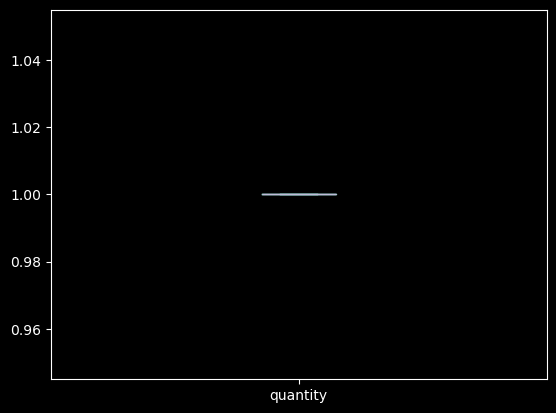

In [27]:
order_details['quantity'].plot(kind='box')
plt.show()

In [28]:
order_details['quantity'].value_counts()

quantity
1    47693
Name: count, dtype: int64

In [29]:
order_summary = order_details.groupby('order_id')['quantity'].sum().reset_index()
order_summary.rename(columns={'quantity':'total_items'}, inplace=True)


In [30]:
order_summary

order_id  total_items
0             1            1
1             2            5
2             3            2
3             4            1
4             5            1
...         ...          ...
21254     21346            4
21255     21347            4
21256     21348            3
21257     21349            1
21258     21350            1

[21259 rows x 2 columns]

In [31]:
pizza.head()

pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

In [32]:
pizza['size'].value_counts()

size
S      32
M      31
L      31
XL      1
XXL     1
Name: count, dtype: int64

In [33]:
pizza['size'] = pizza['size'].replace({
            'S' : 'Small',
            'L' : 'Large',
            'M' : 'Medium',
            'XL': 'Extra Large',
            'XXL' : 'Double Extra Large'
})

In [34]:
pizza['size']

0      Small
1     Medium
2      Large
3      Small
4     Medium
       ...  
91    Medium
92     Large
93     Small
94    Medium
95     Large
Name: size, Length: 96, dtype: object

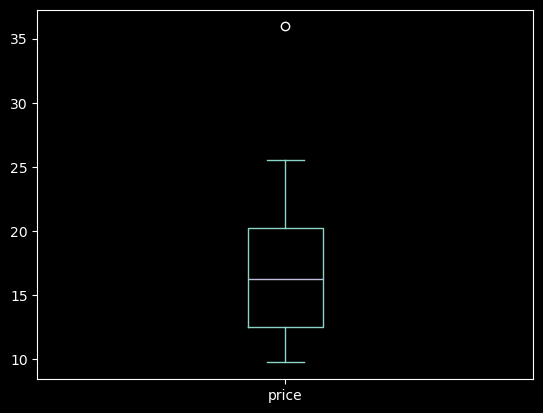

In [35]:
pizza['price'].plot(kind='box')
plt.show()

In [36]:
print(f'len before remove the outliers: {len(pizza)}')


len before remove the outliers: 96


In [37]:
price_q1 = pizza['price'].quantile(0.25)
price_q3 = pizza['price'].quantile(0.75)

price_IQR = price_q3 - price_q1

price_lower = price_q1 - 1.5 * price_IQR
price_upper = price_q3 + 1.5 * price_IQR

pizza = pizza[( pizza['price'] >= price_lower ) & (pizza['price'] <= price_upper )  ]

print(f'len after remove the outliers: {len(pizza)}')

len after remove the outliers: 95


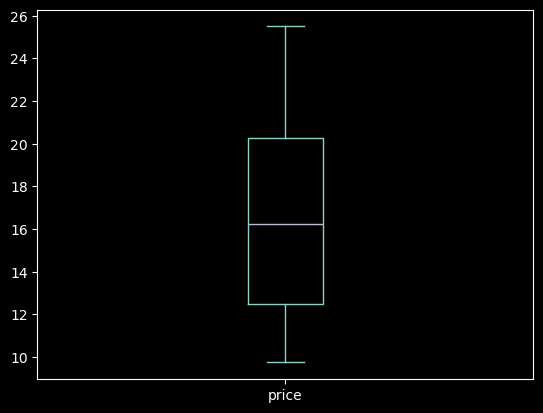

In [38]:
pizza['price'].plot(kind='box')
plt.show()

In [39]:
pizza_type.head()

pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...

In [40]:
pizza_type['name'] = pizza_type['name'].str.replace('The', '', regex=True)

In [41]:
pizza_type.head()


pizza_type_id                       name category  \
0       bbq_ckn     Barbecue Chicken Pizza  Chicken   
1      cali_ckn   California Chicken Pizza  Chicken   
2   ckn_alfredo      Chicken Alfredo Pizza  Chicken   
3     ckn_pesto        Chicken Pesto Pizza  Chicken   
4    southw_ckn    Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...

In [42]:
pizza_type['ingredients'][0].split(',')

['Barbecued Chicken',
 ' Red Peppers',
 ' Green Peppers',
 ' Tomatoes',
 ' Red Onions',
 ' Barbecue Sauce']

In [43]:
ingredients_count_lst = []
for i in range(len(pizza_type)):
     ingredients_count_lst.append(len(pizza_type['ingredients'][i].split(',')))

pizza_type['ingredient_count'] = ingredients_count_lst

pizza_type.head(10)

pizza_type_id                       name category  \
0       bbq_ckn     Barbecue Chicken Pizza  Chicken   
1      cali_ckn   California Chicken Pizza  Chicken   
2   ckn_alfredo      Chicken Alfredo Pizza  Chicken   
3     ckn_pesto        Chicken Pesto Pizza  Chicken   
4    southw_ckn    Southwest Chicken Pizza  Chicken   
5      thai_ckn         Thai Chicken Pizza  Chicken   
6      big_meat             Big Meat Pizza  Classic   
7   classic_dlx       Classic Deluxe Pizza  Classic   
8      hawaiian             Hawaiian Pizza  Classic   
9   ital_cpcllo    Italian Capocollo Pizza  Classic   

                                         ingredients  ingredient_count  
0  Barbecued Chicken, Red Peppers, Green Peppers,...                 6  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...                 7  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...                 6  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...                 6  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...                 8  
5  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...                 5  
6  Bacon, Pepperoni, Italian Sausage, Chorizo Sau...                 4  
7  Pepperoni, Mushrooms, Red Onions, Red Peppers,...                 5  
8           Sliced Ham, Pineapple, Mozzarella Cheese                 3  
9  Capocollo, Red Peppers, Tomatoes, Goat Cheese,...                 6

In [44]:
orders.rename(columns={'month' : 'month name'} , inplace= True)


## Save the cleaned version of the datasets.

In [45]:
orders.to_csv('orders_cleaned.csv', index= False)
order_details.to_csv('orders_details_cleaned.csv' , index= False)
pizza.to_csv('pizza_cleaned.csv', index= False)
pizza_type.to_csv('pizza_type_cleaned.csv', index= False)
order_summary.to_csv('orders_summary.csv')

## Exploratory Data Analysis(EDA).
- Uni-Variant Analysis (ydata_profiling).
- Bi-Variant Analysis.
- Multi-Variant Analysis.

In [46]:
orders

order_id       date                time  hour  day name  year  \
0             1 2015-01-01 2025-11-25 11:38:36    11  Thursday  2015   
1             2 2015-01-01 2025-11-25 11:57:40    11  Thursday  2015   
2             3 2015-01-01 2025-11-25 12:12:28    12  Thursday  2015   
3             4 2015-01-01 2025-11-25 12:16:31    12  Thursday  2015   
4             5 2015-01-01 2025-11-25 12:21:30    12  Thursday  2015   
...         ...        ...                 ...   ...       ...   ...   
21345     21346 2015-12-31 2025-11-25 20:51:07    20  Thursday  2015   
21346     21347 2015-12-31 2025-11-25 21:14:37    21  Thursday  2015   
21347     21348 2015-12-31 2025-11-25 21:23:10    21  Thursday  2015   
21348     21349 2015-12-31 2025-11-25 22:09:54    22  Thursday  2015   
21349     21350 2015-12-31 2025-11-25 23:02:05    23  Thursday  2015   

      month name   day part  
0        January    Morning  
1        January    Morning  
2        January  Afternoon  
3        January  Afternoon  
4        January  Afternoon  
...          ...        ...  
21345   December    Evening  
21346   December      Night  
21347   December      Night  
21348   December      Night  
21349   December      Night  

[21350 rows x 8 columns]

In [47]:
orders.groupby('year').size()

year
2015    21350
dtype: int64

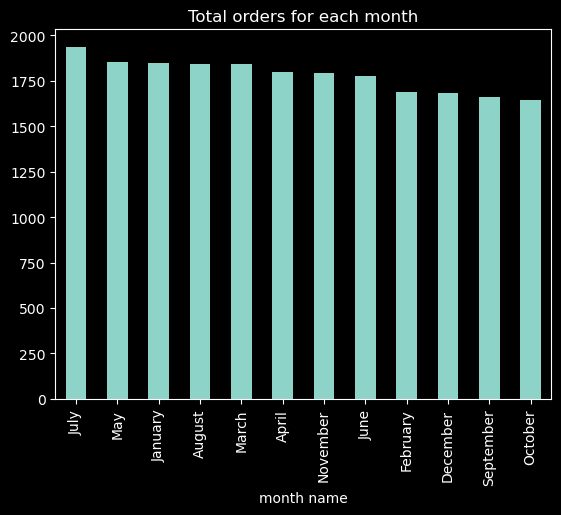

In [48]:
orders['month name'].value_counts().plot(kind='bar' )
plt.title('Total orders for each month')
plt.show()

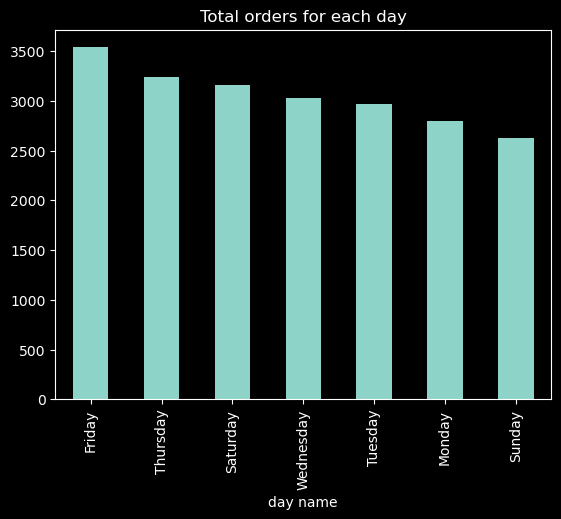

In [49]:
orders['day name'].value_counts().plot(kind='bar' )
plt.title('Total orders for each day')
plt.show()

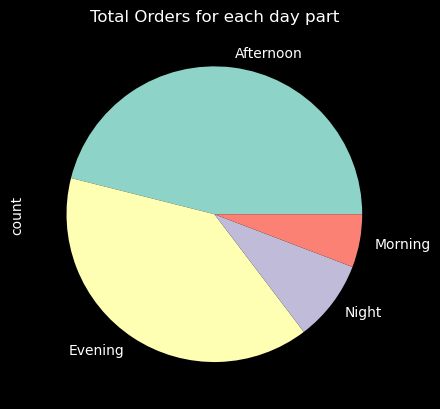

In [50]:
orders['day part'].value_counts().plot(kind='pie')
plt.title('Total Orders for each day part')
plt.show()

In [51]:
orders['hour'].value_counts()

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: count, dtype: int64

In [52]:
orders.groupby(['month name' , 'day part']).size()

month name  day part 
April       Afternoon    824
            Evening      709
            Morning      107
            Night        159
August      Afternoon    821
            Evening      708
            Morning      127
            Night        185
December    Afternoon    775
            Evening      678
            Morning       96
            Night        131
February    Afternoon    761
            Evening      670
            Morning       97
            Night        157
January     Afternoon    870
            Evening      726
            Morning      100
            Night        149
July        Afternoon    878
            Evening      753
            Morning      129
            Night        175
June        Afternoon    858
            Evening      671
            Morning       99
            Night        145
March       Afternoon    874
            Evening      734
            Morning       93
            Night        139
May         Afternoon    821
            Evening  

In [53]:
order_details

order_details_id  order_id       pizza_id  quantity
0                     1         1     hawaiian_m         1
1                     2         2  classic_dlx_m         1
2                     3         2  five_cheese_l         1
3                     4         2    ital_supr_l         1
4                     5         2     mexicana_m         1
...                 ...       ...            ...       ...
48615             48616     21348  ckn_alfredo_m         1
48616             48617     21348  four_cheese_l         1
48617             48618     21348   napolitana_s         1
48618             48619     21349     mexicana_l         1
48619             48620     21350      bbq_ckn_s         1

[47693 rows x 4 columns]

In [54]:
pizza

pizza_id pizza_type_id    size  price
0       bbq_ckn_s       bbq_ckn   Small  12.75
1       bbq_ckn_m       bbq_ckn  Medium  16.75
2       bbq_ckn_l       bbq_ckn   Large  20.75
3      cali_ckn_s      cali_ckn   Small  12.75
4      cali_ckn_m      cali_ckn  Medium  16.75
..            ...           ...     ...    ...
91  spinach_fet_m   spinach_fet  Medium  16.00
92  spinach_fet_l   spinach_fet   Large  20.25
93   veggie_veg_s    veggie_veg   Small  12.00
94   veggie_veg_m    veggie_veg  Medium  16.00
95   veggie_veg_l    veggie_veg   Large  20.25

[95 rows x 4 columns]

In [55]:
pizza['size'].value_counts()

size
Small          32
Medium         31
Large          31
Extra Large     1
Name: count, dtype: int64

In [56]:
pizza.groupby('size')['price'].mean().round(2)

size
Extra Large    25.50
Large          20.02
Medium         15.99
Small          12.51
Name: price, dtype: float64

In [57]:
pizza_type.tail()

pizza_type_id                            name category  \
27  mediterraneo             Mediterranean Pizza   Veggie   
28      mexicana                  Mexicana Pizza   Veggie   
29    spin_pesto             Spinach Pesto Pizza   Veggie   
30   spinach_fet          Spinach and Feta Pizza   Veggie   
31    veggie_veg   Vegetables + Vegetables Pizza   Veggie   

                                          ingredients  ingredient_count  
27  Spinach, Artichokes, Kalamata Olives, Sun-drie...                 7  
28  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...                 8  
29  Spinach, Artichokes, Tomatoes, Sun-dried Tomat...                 6  
30  Spinach, Mushrooms, Red Onions, Feta Cheese, G...                 5  
31  Mushrooms, Tomatoes, Red Peppers, Green Pepper...                 8

<Axes: xlabel='category'>

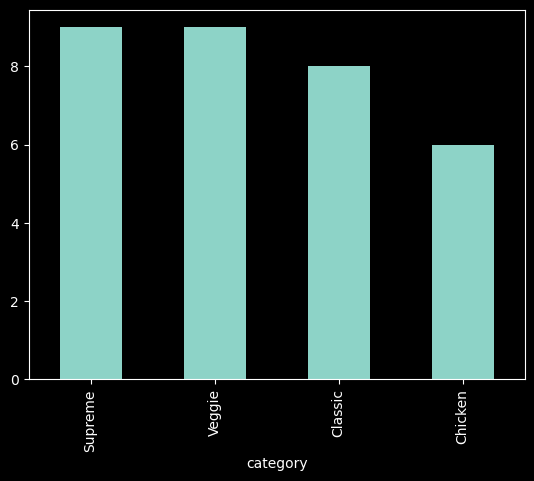

In [58]:
pizza_type['category'].value_counts().plot(kind='bar')

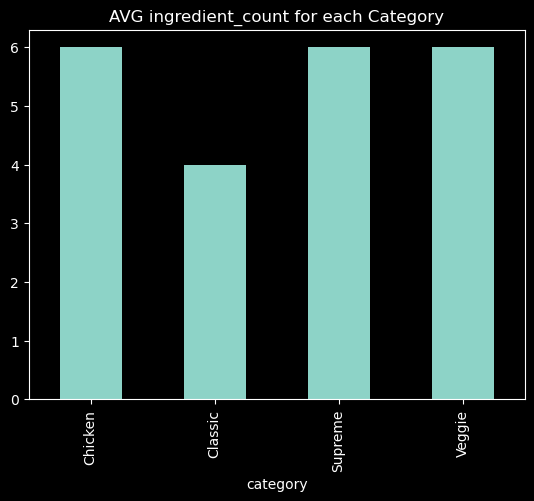

In [59]:
pizza_type.groupby('category')['ingredient_count'].mean().round().plot(kind='bar')
plt.title('AVG ingredient_count for each Category')
plt.show()